In [1078]:
import pandas  as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification, make_blobs
from sklearn.preprocessing import PowerTransformer,FunctionTransformer
from sklearn.model_selection import train_test_split

from sklearn.compose import ColumnTransformer

from sklearn.metrics import accuracy_score, precision_score,recall_score,roc_auc_score, confusion_matrix, f1_score, roc_auc_score

# Transformers
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import LabelEncoder,StandardScaler

# smote
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.shape

(45000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [7]:
df.duplicated().sum()

0

In [12]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [16]:
# plt.figure(figsize = (15,6))
# sns.scatterplot(data = df, x= 'person_age',y = 'person_income',hue = 'loan_status')
# plt.xlim(20,80)
# # plt.ylim(1,5)

# Numerical columns
- person_income
- person_emp_exp
- loan_amount
- loan_int_rate
- loan_percent_income
- credit_hist_length
- credit_score
  
# Insights for numerical columns
1. Which feature are governing that the loan will be approved or rejected
   -  if previous defaulters chances are the loan will be rejected.
   -  credit score could be the feature which is deciding the rejection or approval of the loan, if more, chances are loan is apporved
   -  cb_person_cred_hist_length, if its more, chances are the loan is approved
   - loan intent, plays a role in rejection and approval
   - person_home_ownership, mostly rejecting if its mortgage
   - loan_percent_income, if low, its rejecting the loan, very important column
   - previous_loan_defaults_on_file, if yes, THEN 100% loan is not given. very strong
   - Cant drop rows just like that, the data is imbalanced with only 22% of the minority class
   - Credit score and loan intent have something in them which relate to laon rejection :- specially medical and more serious intent, plotting differently
  
# actions on the numerical columns
- Yeo johnson tranformation on the age, loan amount, didnt help much
- adding monthly salary column in the data set, anyway drop it 
- dropping person age, as it has high multicollineairty with the credit length
- dropping person_emp_exp as its highly correlated with the credit score length, and less related to the target variable
- Loan_amount:- log transformed and the plot looks much better now. outliers are adjusted
- Loan_percent_income:- sqrt tranformation and we got almost a normal distribution
  

# we are not dropping the outliers as such because there are minority classes as well
  
     

In [766]:
# df.drop(columns=['person_Monthly_salary'],inplace=True)

In [768]:
df.sample(1)

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
33663,67017.0,RENT,9000.0,HOMEIMPROVEMENT,11.69,0.13,2.0,707,No,0


In [555]:
print('minority class percentage' , 10000/45000*100)

minority class percentage 22.22222222222222


## There is imbalance in the output classes, we will use smote to oversample the minority class. but before that analysis of the columns

# Univaraite analysis of the numerical columns 

In [24]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [249]:
temp =df.copy()


<Axes: xlabel='loan_percent_income'>

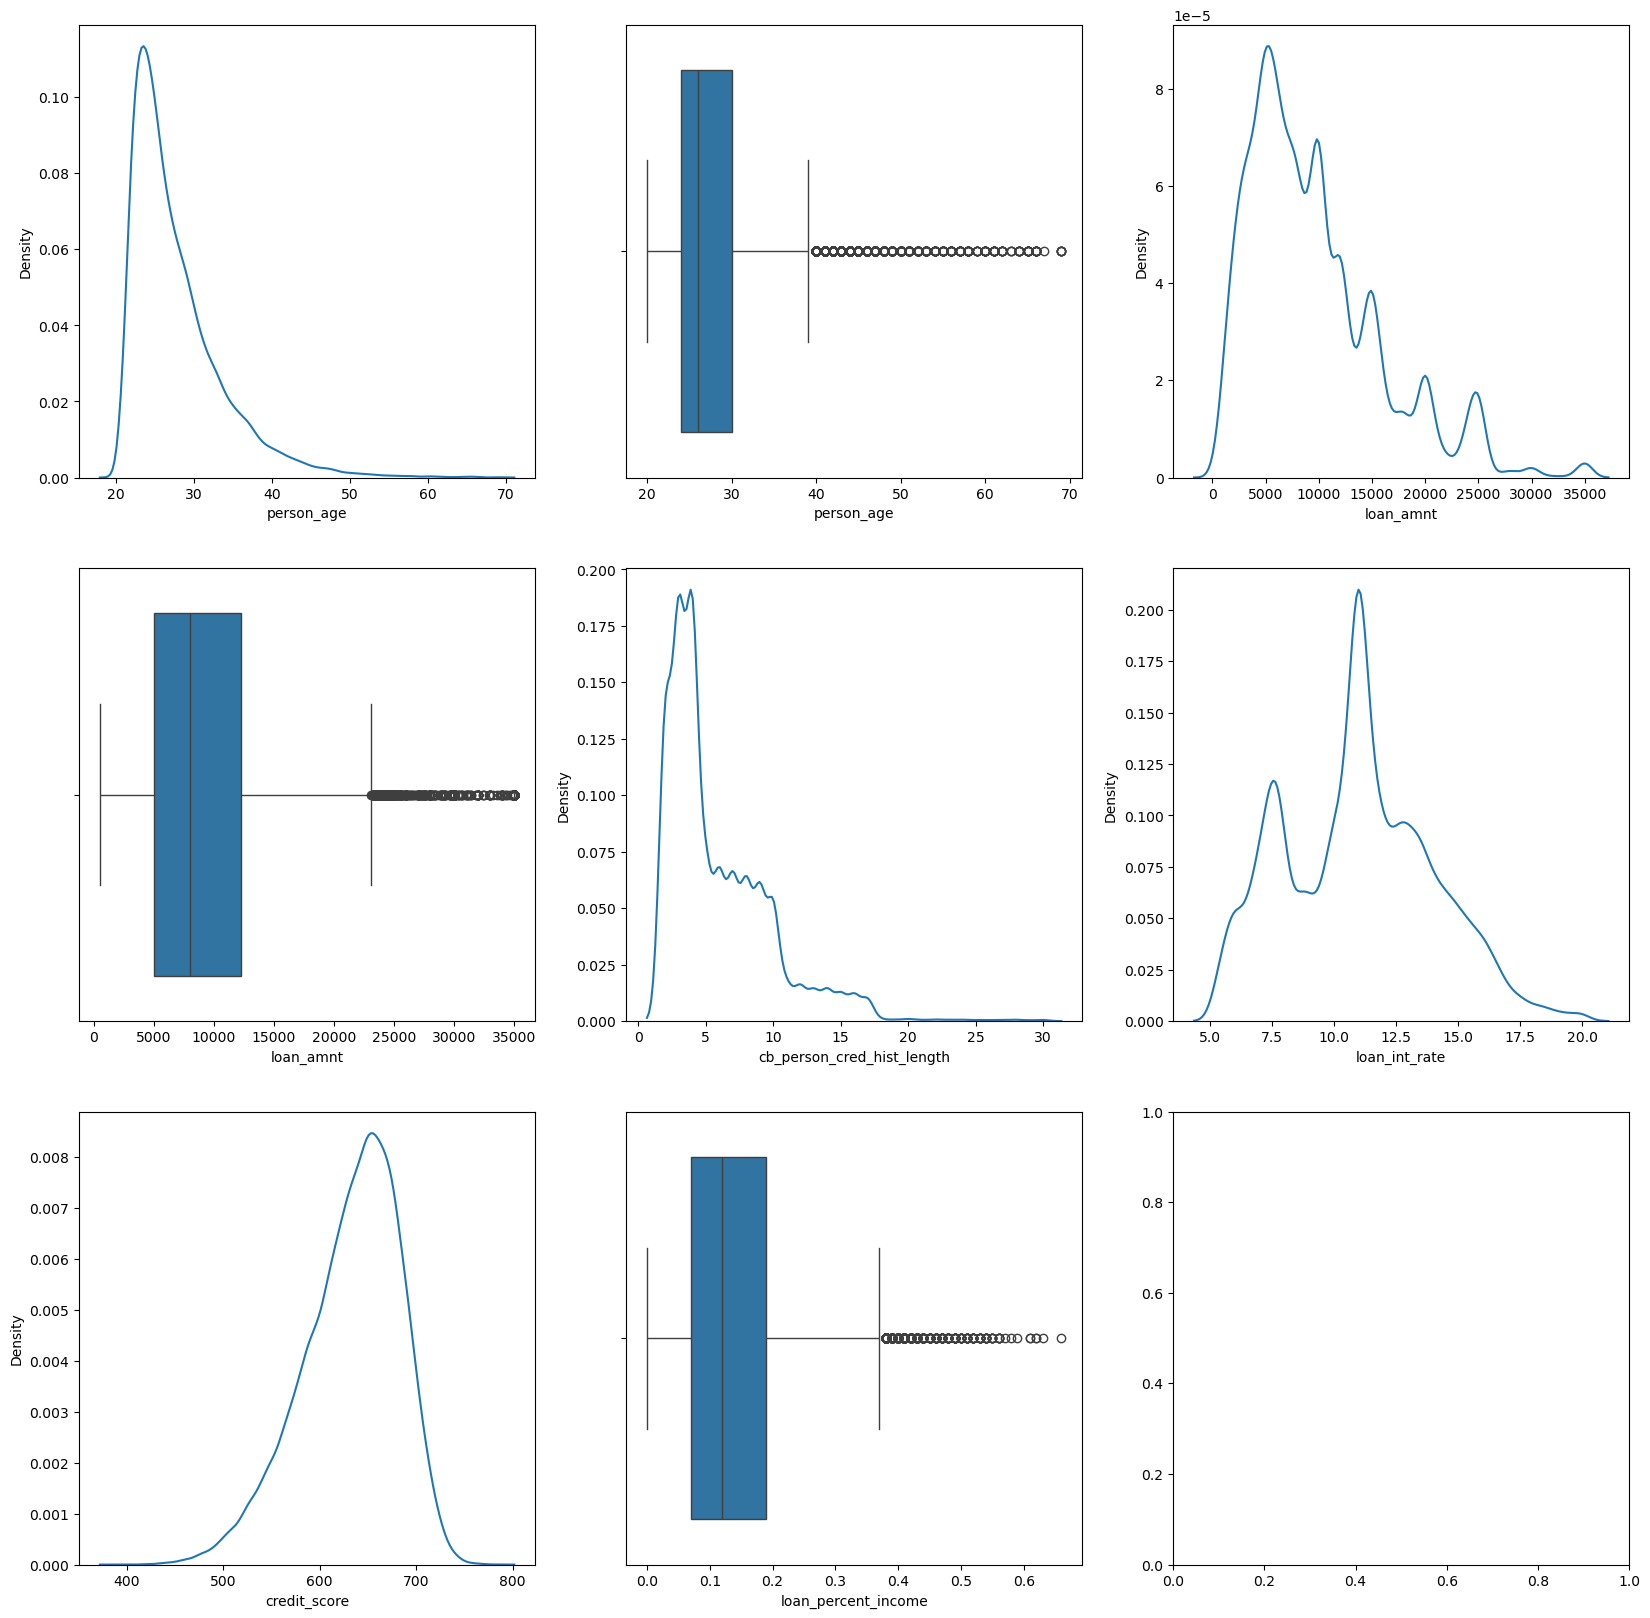

In [557]:
fig , axes = plt.subplots(3,3,figsize = (20,20))
sns.kdeplot(data = df, x='person_age',ax=axes[0][0])
sns.boxplot(data = df, x='person_age',ax=axes[0][1])
sns.kdeplot(data = df, x='loan_amnt',ax=axes[0][2])
sns.boxplot(data = df, x='loan_amnt',ax=axes[1][0])
sns.kdeplot(data = df, x='cb_person_cred_hist_length',ax=axes[1][1])
sns.kdeplot(data = df, x='loan_int_rate',ax=axes[1][2])
sns.kdeplot(data = df, x='credit_score',ax=axes[2][0])
sns.boxplot(data = df, x = 'loan_percent_income',ax=axes[2][1])


<Axes: xlabel='loan_status', ylabel='loan_amnt'>

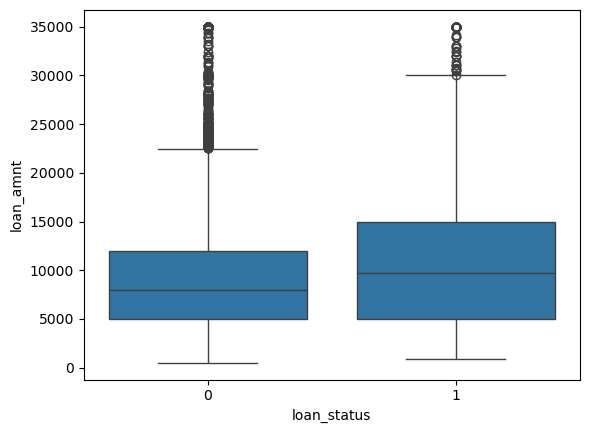

In [784]:
sns.boxplot(x='loan_status', y='loan_amnt', data=df)

<Axes: xlabel='loan_amnt', ylabel='Density'>

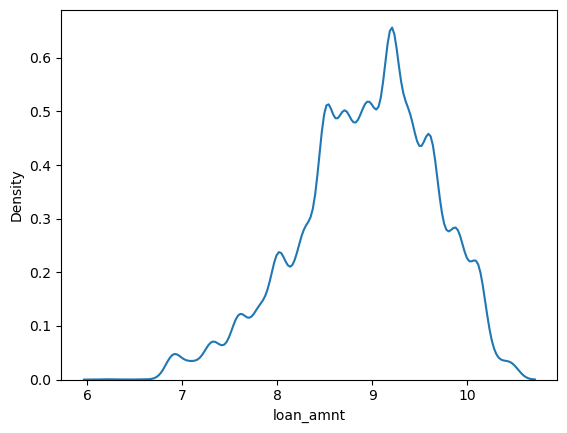

In [792]:
temp = df.copy()
df['loan_amnt'] = np.log1p(df['loan_amnt'])
sns.kdeplot(data = temp,x = 'loan_amnt')

In [565]:
# but later on dropped
df['person_Monthly_salary'] = df['person_income']/12

<Axes: xlabel='loan_percent_income', ylabel='Density'>

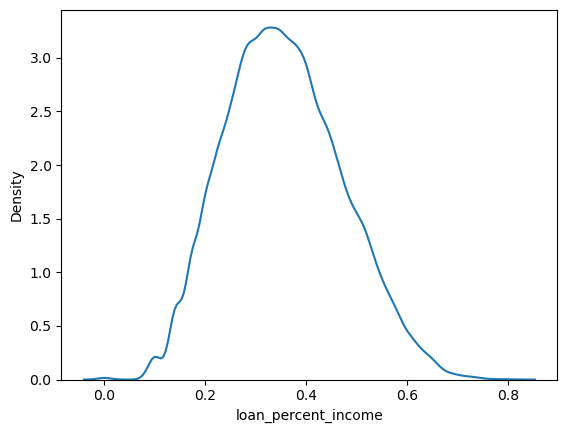

In [814]:
temp = df.copy()
df['loan_percent_income'] = np.sqrt(df['loan_percent_income'])
sns.kdeplot(data = df,x='loan_percent_income')

<Axes: xlabel='loan_percent_income'>

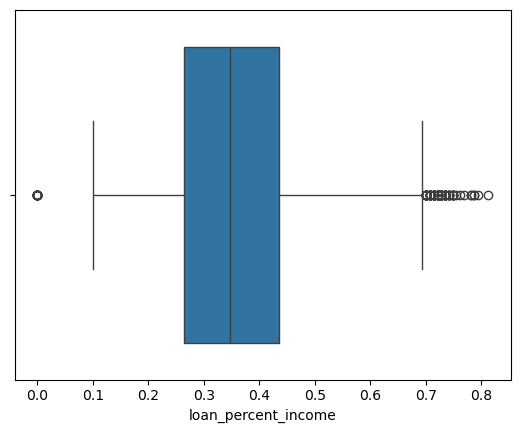

In [819]:
sns.boxplot(data =df, x = 'loan_percent_income')

In [593]:
# df[df['loan_percent_income']>0.5][df[df['loan_percent_income']>0.5]['loan_status']==1]

In [599]:
# df[df['credit_score']>750].groupby('loan_status').count()

In [597]:
# df[df['credit_score']>750]

In [603]:
# df[df['previous_loan_defaults_on_file']=='Yes'].groupby('loan_status').count()

In [605]:
# df[df['previous_loan_defaults_on_file']=='Yes'].groupby('loan_status').count()

In [213]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [266]:
# Applying transformation on the numerical data on a temp data set, plotting results and then comparing with original

In [ ]:
# loan_amnt
# cb_person_cred_hist_length
# loan_int_rate

<Axes: xlabel='loan_int_rate_yeo', ylabel='Density'>

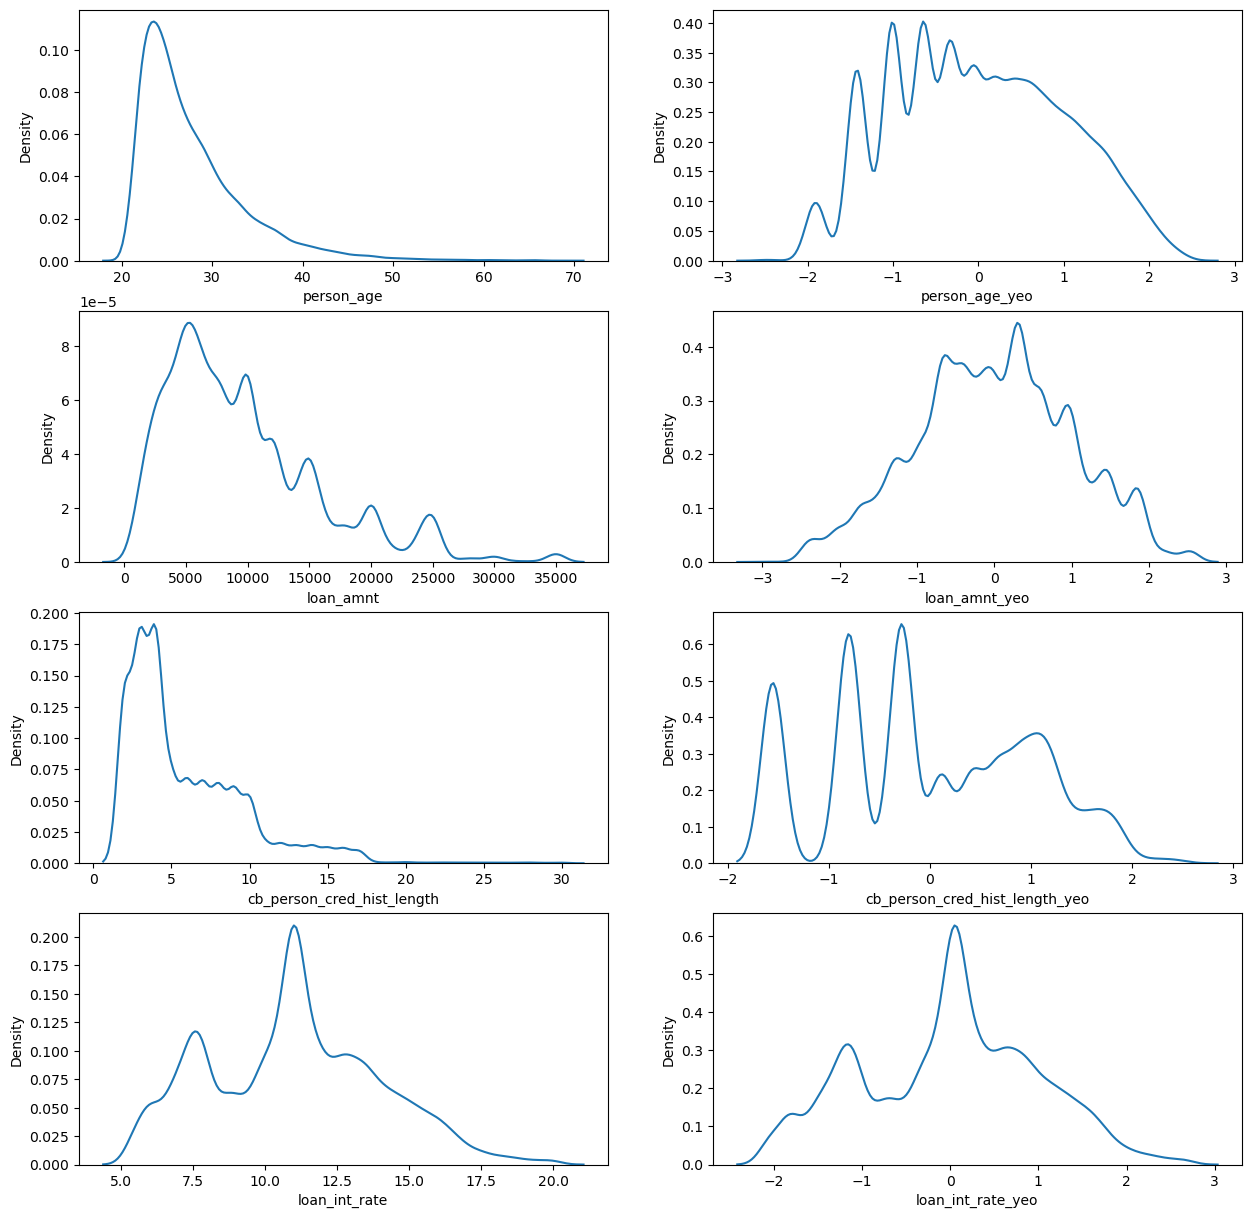

In [607]:
temp = df.copy()
temp['person_age_log'] = np.log(df['person_age'])

temp['person_age_yeo'] = pt.fit_transform(temp['person_age'].values.reshape(-1,1)).flatten()


temp['loan_amnt_yeo'] = pt.fit_transform(temp['loan_amnt'].values.reshape(-1,1)).flatten()
temp['cb_person_cred_hist_length_yeo'] = pt.fit_transform(temp['cb_person_cred_hist_length'].values.reshape(-1,1)).flatten()
temp['cb_person_cred_hist_length_log'] = np.log(df['cb_person_cred_hist_length'])
temp['loan_int_rate_yeo'] = pt.fit_transform(temp['loan_int_rate'].values.reshape(-1,1)).flatten()


fig , axes = plt.subplots(4,2,figsize = (15,15))
sns.kdeplot(data = temp, x='person_age',ax=axes[0][0])
sns.kdeplot(data = temp, x='person_age_yeo',ax=axes[0][1])


sns.kdeplot(data = temp, x='loan_amnt',ax=axes[1][0])
sns.kdeplot(data = temp, x='loan_amnt_yeo',ax=axes[1][1])


sns.kdeplot(data = temp, x='cb_person_cred_hist_length',ax=axes[2][0])
sns.kdeplot(data = temp, x='cb_person_cred_hist_length_yeo',ax=axes[2][1])


sns.kdeplot(data = temp, x='loan_int_rate',ax=axes[3][0])
sns.kdeplot(data = temp, x='loan_int_rate_yeo',ax=axes[3][1])



In [320]:
# temp[temp['cb_person_cred_hist_length']>17][temp[temp['cb_person_cred_hist_length']>17]['loan_status']==0]

In [322]:
## appyling svm, logistic regression on initial data and get the accuracy once.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [349]:
X = df[['person_age','person_income','person_emp_exp','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score']]
y=df['loan_status']

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)
svc = SVC(kernel='rbf')
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
print('accuracy for lr', accuracy_score(y_test, lr.predict(X_test)))

accuracy for lr 0.8267007558915074


In [352]:
svc.fit(X_train, y_train)
print('accuracy for SVC', accuracy_score(y_test, svc.predict(X_test)))

accuracy for SVC 0.8101378390395731


In [612]:
# temp = df.copy()
# temp.to_csv('latest1.csv')

# Actions
1. Transformer on cage and loan amount
2. drop the outlier from majority class
3. then apply smote to get minority class up

In [490]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=41)
power = PowerTransformer(method='yeo-johnson')

col = ['person_age','loan_amnt']

trf = ColumnTransformer(transformers=[
    ('yeo',PowerTransformer(method='yeo-johnson'),['person_age','loan_amnt'])
],remainder='passthrough')

In [492]:
X_transformed = trf.fit_transform(X_train)
X_test_trans = trf.transform(X_test)

cols =  X_train.columns

# X_test_trans

X_transformed = pd.DataFrame(X_transformed,columns=cols)
X_test_trans = pd.DataFrame(X_test_trans,columns=cols)

In [622]:
svc.fit(X_transformed, y_train)
print('accuracy for SVC', accuracy_score(y_test, svc.predict(X_test_trans)))

C:\Users\Shivam Srivastava\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


accuracy for SVC 0.7826811916407292


In [496]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_transformed, y_train)
print('accuracy for lr', accuracy_score(y_test, lr.predict(X_test_trans)))

In [614]:
cols

Index(['person_age', 'person_income', 'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score'],
      dtype='object')

<Axes: >

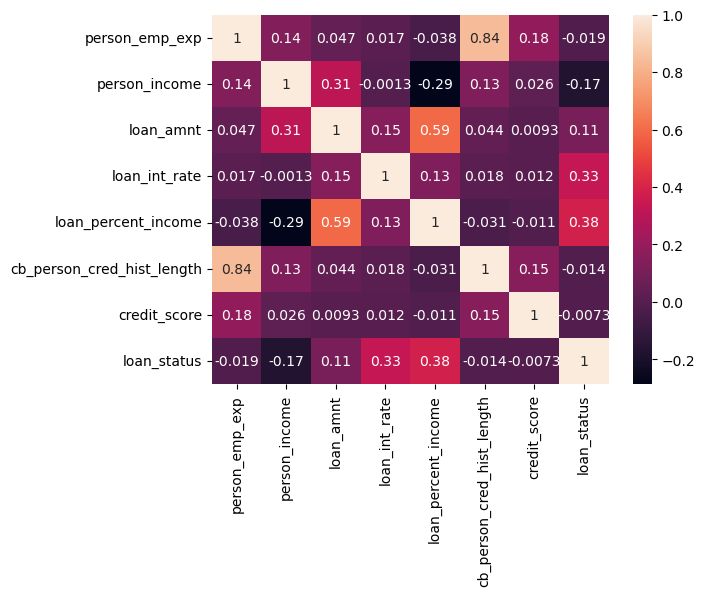

In [740]:
temp = df[['person_emp_exp','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']]
sns.heatmap(temp.corr(),annot=True)

In [743]:
df[['person_emp_exp','cb_person_cred_hist_length']]


,person_emp_exp,cb_person_cred_hist_length
0,0,3.0
1,0,2.0
2,3,3.0
3,0,2.0
4,1,4.0
...,...,...
44995,6,3.0
44996,17,11.0
44997,7,10.0
44998,4,6.0


<Axes: xlabel='person_emp_exp', ylabel='cb_person_cred_hist_length'>

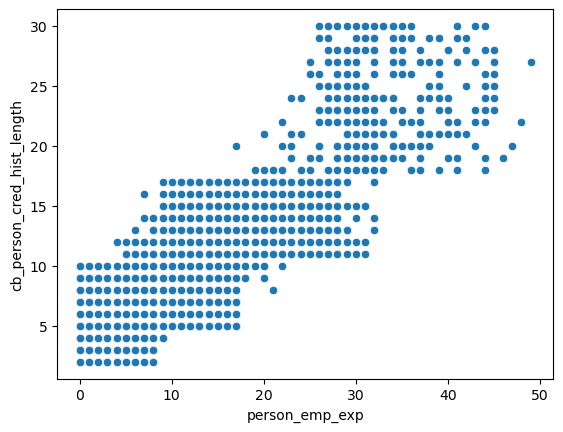

In [755]:
sns.scatterplot(data = df,x = 'person_emp_exp',y = 'cb_person_cred_hist_length')


In [757]:
df.drop(columns=['person_emp_exp'],inplace=True)

<Axes: >

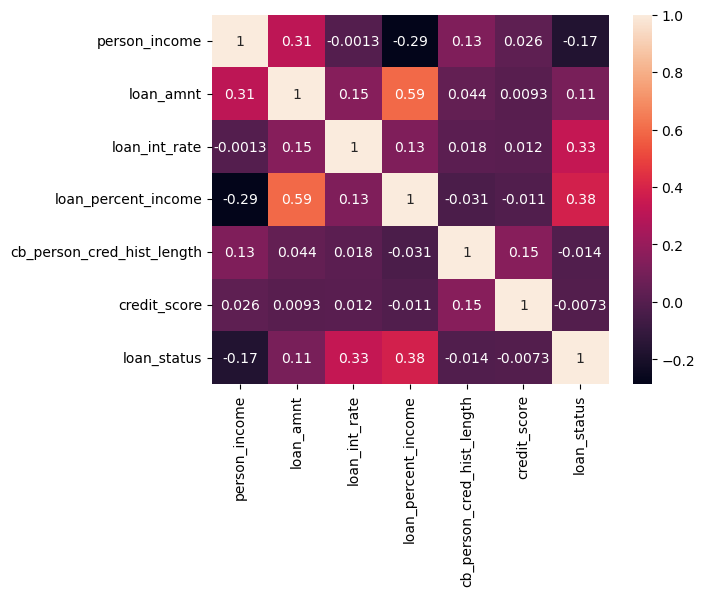

In [761]:
temp = df[['person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']]
sns.heatmap(temp.corr(),annot=True)

In [763]:
df

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,person_Monthly_salary
0,71948.0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,5995.666667
1,12282.0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,1023.500000
2,12438.0,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,1036.500000
3,79753.0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,6646.083333
4,66135.0,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,5511.250000
...,...,...,...,...,...,...,...,...,...,...,...
44995,47971.0,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,3997.583333
44996,65800.0,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,5483.333333
44997,56942.0,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,4745.166667
44998,33164.0,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,2763.666667


# Categorical columns analysis 
1. person_gender
2. person_education
3. person_home_ownership
4. loan_intent
5. previous_loan_defaults_on_file

# Insights for categorical columns
1. Which feature are governing that the loan will be approved or rejected
   - Mortgage/rent rejection ration is very high
   - calculate percentages amount of who's getting and who's not
   - person home ownership is not that strong indicator
   - Loan intent percentages will show us what type of loans are rejected most
   - previous loan default is a negative predictor


# action on categorical column 
- dropping gender column, due to percentages for loan_status(approval or rejection is very similar)
- droppping person_education column due to percentages for loan_status(approval or rejection is very similar)
- keeping the person home ownership as there is variance in type of home ownership. if its mortage then approval is less, and if its rent or other approval is more
- person_default = YES, 0 approval, if no then other factors are kicking in as person_default = NO, the rejection and approval is alsmost equal.
- Loan intent is yet another column to keep, debt consolidation is max approval and education and venture is less approved maybe due to repaying capacity
- Applying chi2 test on the columns to see if they have dependency on the target variable or not.
     

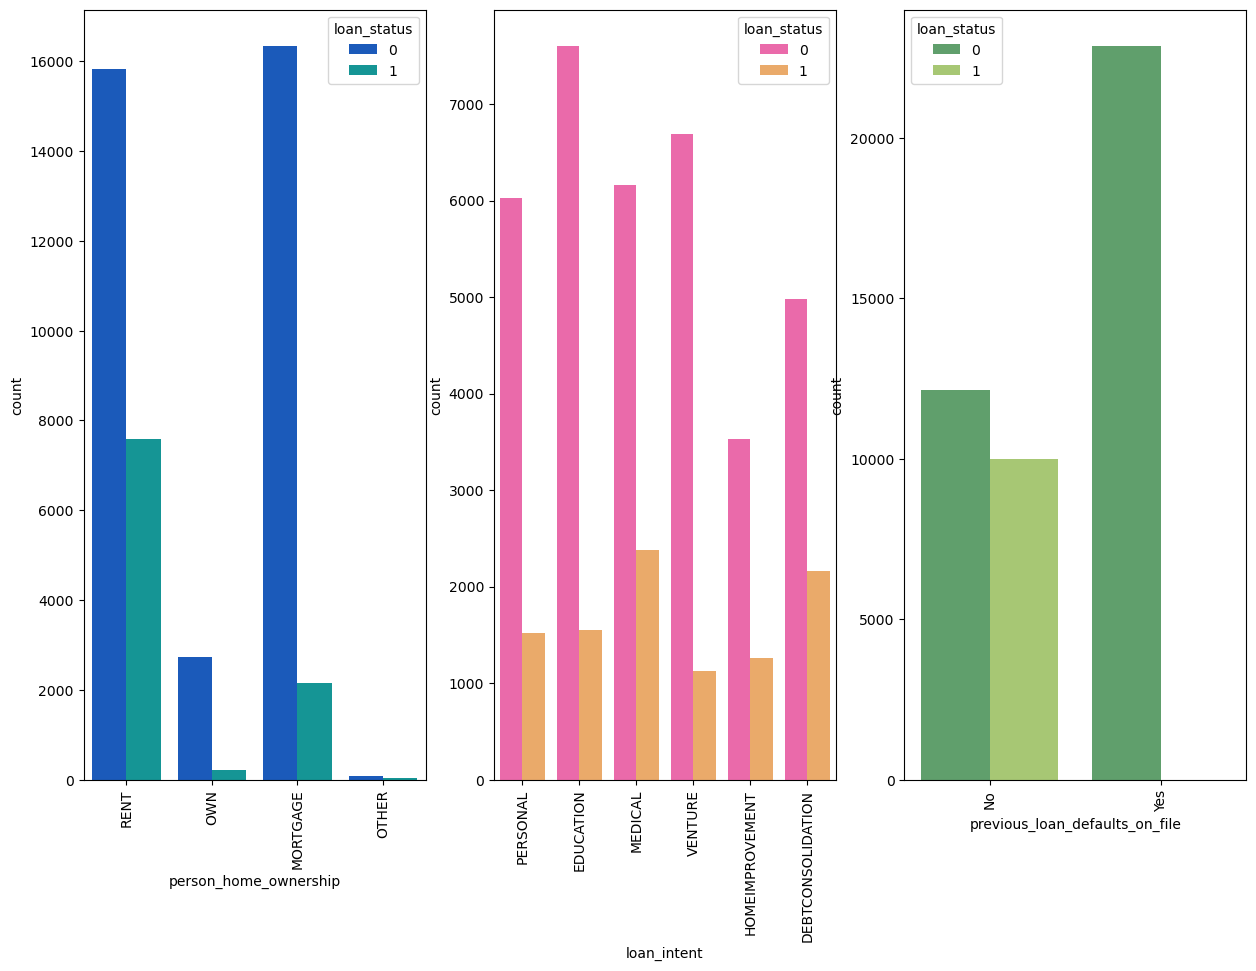

In [715]:
fig, axes = plt.subplots(1,3,figsize = (15,10))
# sns.countplot(data = df, x='person_gender',ax = axes[0,0],palette='winter',hue='loan_status')
# sns.countplot(data = df, x='person_education',ax = axes[0,1],palette='winter',hue='loan_status')
sns.countplot(data = df, x='person_home_ownership',ax = axes[0],palette='winter',hue='loan_status')
sns.countplot(data = df, x='loan_intent',ax = axes[1],palette='spring',hue='loan_status')
sns.countplot(data = df, x='previous_loan_defaults_on_file',ax = axes[2],palette='summer',hue='loan_status')
axes[0].tick_params(axis='x', rotation=90)
axes[1].tick_params(axis='x', rotation=90)
axes[2].tick_params(axis='x', rotation=90)


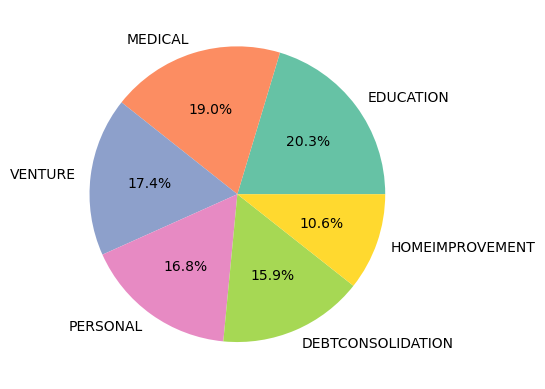

In [692]:
intent_count = df['loan_intent'].value_counts()
plt.pie(intent_count,labels=intent_count.index,autopct = '%1.1f%%',colors=plt.cm.Set2.colors)
plt.show()

In [653]:
## plotting the cross tab for theprevious loan defaults
pd.crosstab(df['previous_loan_defaults_on_file'],df['loan_status'],normalize='index')*100

loan_status,0,1
previous_loan_defaults_on_file,,
No,54.815384,45.184616
Yes,100.000000,0.000000


In [657]:
## plotting the cross tab for the [person home ownership]
pd.crosstab(df['person_home_ownership'],df['loan_status'],normalize='index')*100

loan_status,0,1
person_home_ownership,,
MORTGAGE,88.398896,11.601104
OTHER,66.666667,33.333333
OWN,92.477126,7.522874
RENT,67.591446,32.408554


In [683]:

## plotting the cross tab for the gender
pd.crosstab(df['person_gender'],df['loan_status'],normalize='index')*100

loan_status,0,1
person_gender,,
female,77.747457,22.252543
male,77.790759,22.209241


In [690]:
# df.drop(columns=['person_gender'],inplace=True)

In [697]:
## plotting the cross tab for the [person home ownership]
pd.crosstab(df['person_education'],df['loan_status'],normalize='index')*100

loan_status,0,1
person_education,,
Associate,77.955245,22.044755
Bachelor,77.475728,22.524272
Doctorate,77.133655,22.866345
High School,77.678422,22.321578
Master,78.237822,21.762178


In [707]:
## plotting the cross tab for the [person home ownership]
pd.crosstab(df['loan_intent'],df['loan_status'],normalize='index')*100

loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,69.736842,30.263158
EDUCATION,83.040105,16.959895
HOMEIMPROVEMENT,73.698516,26.301484
MEDICAL,72.159756,27.840244
PERSONAL,79.846297,20.153703
VENTURE,85.566219,14.433781


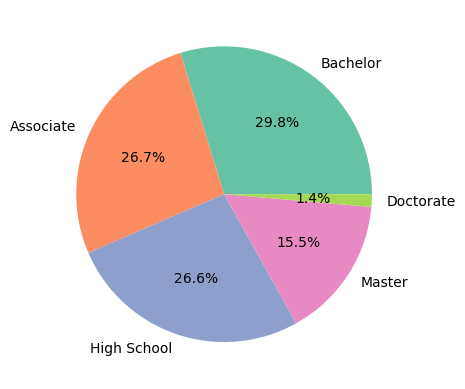

In [699]:
intent_count = df['person_education'].value_counts()
plt.pie(intent_count,labels=intent_count.index,autopct = '%1.1f%%',colors=plt.cm.Set2.colors)
plt.show()

In [703]:
# df.drop(columns=['person_education'],inplace  = True)

<Axes: >

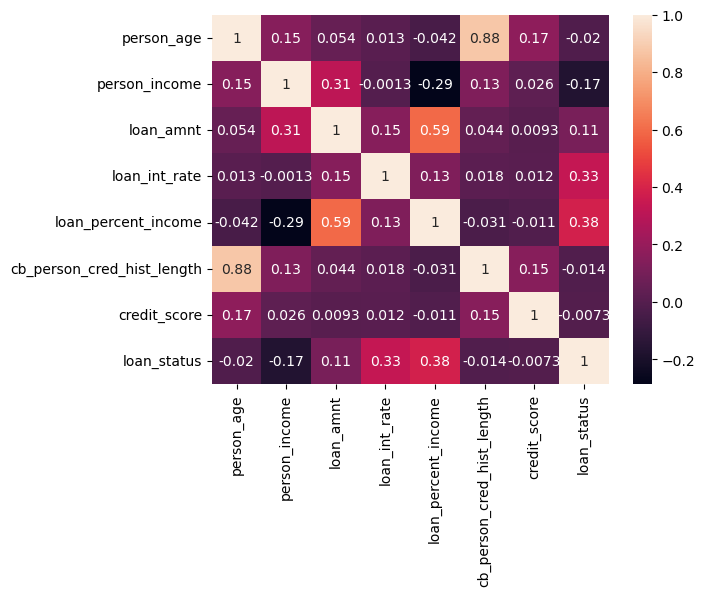

In [671]:
temp = df[['person_age','person_income','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','loan_status']]
sns.heatmap(temp.corr(),annot=True)

In [669]:
df[['person_age','cb_person_cred_hist_length']]

,person_age,cb_person_cred_hist_length
0,22.0,3.0
1,21.0,2.0
2,25.0,3.0
3,23.0,2.0
4,24.0,4.0
...,...,...
44995,27.0,3.0
44996,37.0,11.0
44997,33.0,10.0
44998,29.0,6.0


In [675]:
# dropping person's age
# df.drop(columns=['person_age'],inplace = True)

# Chi-square test

In [840]:
temp = df.copy()
df.to_csv('latest_23_jul.csv')

In [847]:
temp.head()

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71948.0,RENT,2.439136,PERSONAL,16.02,0.700000,3.0,561,No,1
1,12282.0,OWN,2.067970,EDUCATION,11.14,0.282843,2.0,504,Yes,0
2,12438.0,MORTGAGE,2.263084,MEDICAL,12.87,0.663325,3.0,635,No,1
3,79753.0,RENT,2.439136,MEDICAL,15.23,0.663325,2.0,675,No,1
4,66135.0,RENT,2.439136,MEDICAL,14.27,0.728011,4.0,586,No,1


In [853]:
encoder = LabelEncoder()
cat_col = ['person_home_ownership','loan_intent','previous_loan_defaults_on_file']

In [855]:
for col in cat_col:
    temp[col] = encoder.fit_transform(temp[col])

In [857]:
temp.head()

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71948.0,3,2.439136,4,16.02,0.700000,3.0,561,0,1
1,12282.0,2,2.067970,1,11.14,0.282843,2.0,504,1,0
2,12438.0,0,2.263084,3,12.87,0.663325,3.0,635,0,1
3,79753.0,3,2.439136,3,15.23,0.663325,2.0,675,0,1
4,66135.0,3,2.439136,3,14.27,0.728011,4.0,586,0,1


In [859]:
# Applying chi square
X = temp[cat_col]
y = temp['loan_status']

chi_selector = SelectKBest(score_func=chi2,k='all')
chi_selector.fit(X,y)

SelectKBest(k='all', score_func=<function chi2 at 0x000001DE668F8E00>)

In [861]:
chi_scores = pd.DataFrame(
    {
        'feature':cat_col,
        'chi2_score':chi_selector.scores_,
        'p-value':chi_selector.pvalues_
    }
).sort_values(by='chi2_score',ascending=False)

In [863]:
chi_scores

,feature,chi2_score,p-value
2,previous_loan_defaults_on_file,6531.283533,0.000000e+00
0,person_home_ownership,3008.975931,0.000000e+00
1,loan_intent,275.839636,6.056689e-62


# Its evident that the low p-values suggest that the columns are significant and hence not dropping. 
# so we are directly applying smote now to reduce imbalance data set.

In [874]:
for col in cat_col:
    df[col] = encoder.fit_transform(df[col])

In [876]:
df.head()

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71948.0,3,2.439136,4,16.02,0.700000,3.0,561,0,1
1,12282.0,2,2.067970,1,11.14,0.282843,2.0,504,1,0
2,12438.0,0,2.263084,3,12.87,0.663325,3.0,635,0,1
3,79753.0,3,2.439136,3,15.23,0.663325,2.0,675,0,1
4,66135.0,3,2.439136,3,14.27,0.728011,4.0,586,0,1


In [981]:
## train test split
X = df.drop(columns=['loan_status'])
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [983]:
## since we are applying svm, we would first stamdarised the columns and.
Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)

In [ ]:
## then applying smote on the transformed data.

In [985]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled,y_train)

C:\Users\Shivam Srivastava\anaconda3\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [988]:
y_train_res[y_train_res ==1].size

27973

In [990]:
y_train_res[y_train_res ==1].size/y_train_res.size

0.5

# Comparing the values of accuracy, precision score, recall and f1 score, before and after applying smote.

## Model building

## before SMOTE

In [1090]:
svm = SVC(kernel='rbf',C = 10,probability=True)
svm.fit(X_train,y_train)
y_pred_before = svm.predict(X_test_scaled)

C:\Users\Shivam Srivastava\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [1092]:
confusion_matrix(y_test, y_pred_before)

array([[   0, 7007],
       [   0, 1989]], dtype=int64)

In [1094]:
acc_score_before = accuracy_score(y_test, y_pred_before)
acc_score_before 

0.22109826589595374

In [1096]:
precision_score_before = precision_score(y_test, y_pred_before)
precision_score_before

0.22109826589595374

In [1098]:
recall_before = recall_score(y_test, y_pred_before)
recall_before 

1.0

In [1100]:
f1_before = f1_score(y_test, y_pred_before)
f1_before

0.3621301775147929

In [1133]:
y_pred_proba = svm.predict_proba(X_test_scaled)[:,1]
roc_before = roc_auc_score(y_test,y_pred_proba)
roc_before


C:\Users\Shivam Srivastava\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


0.7543521263624691

## After Smote

In [1117]:
svm2 = SVC(kernel='rbf',C = 10,probability=True)
svm2.fit(X_train_res,y_train_res)
y_pred_after = svm2.predict(X_test_scaled)

In [1119]:
confusion_matrix(y_test, y_pred_after)

array([[6035,  972],
       [ 142, 1847]], dtype=int64)

In [1121]:
acc_score_after = accuracy_score(y_test, y_pred_after)
acc_score_after

0.8761671854157403

In [1123]:
precision_score_after = precision_score(y_test, y_pred_after)
precision_score_after

0.6551968783256474

In [1125]:

recall_score_after = recall_score(y_test, y_pred_after)
recall_score_after

0.9286073403720463

In [1127]:
f1_score_after = f1_score(y_test, y_pred_after)
f1_score_after 

0.7683028286189684

In [1135]:
y_pred_proba = svm2.predict_proba(X_test_scaled)[:,1]
roc_afer = roc_auc_score(y_test,y_pred_proba)
roc_afer


0.9596017714957601

In [1141]:
result = pd.DataFrame({
    'Before':[acc_score_before,precision_score_before,recall_before,f1_before,roc_before],
    'After':[acc_score_after,precision_score_after,recall_score_after,f1_score_after,roc_afer]
})

In [1143]:
result.index = ['Accuracy','Precision','Recall','F1_score','ROC_AUC_Score']

In [1145]:
result

,Before,After
Accuracy,0.221098,0.876167
Precision,0.221098,0.655197
Recall,1.000000,0.928607
F1_score,0.362130,0.768303
ROC_AUC_Score,0.754352,0.959602


# Outcome
Since the loan default dataset was more imbalanced and after applying the resampling technique SMOTE, we can see there is quite an improvement in the values of precision, recall and f1 score.
For the loan dataset, we would be wanting that the actual positives are correctly identified, we would be paying more attention to the value of recall. 
but since that has decreased, we can still see that the value of f1 score has significantly increased and hence we can accept those results well.


C:\Users\Shivam Srivastava\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


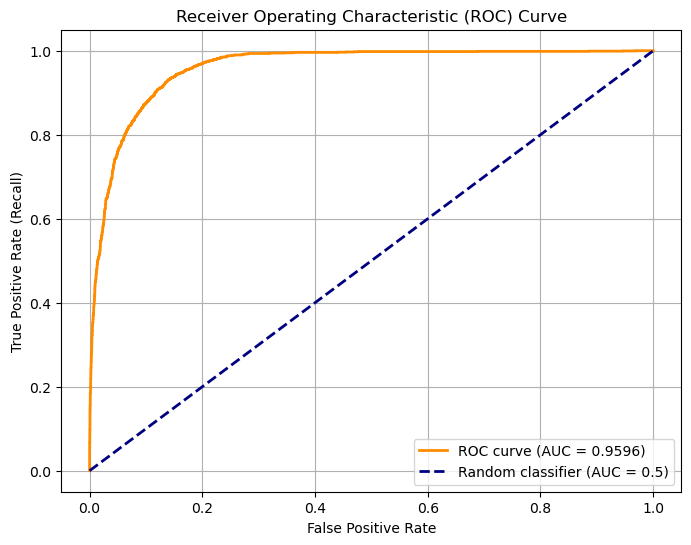

In [1147]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict probabilities for class 1 (loan approved)
y_proba = svm.predict_proba(X_test_scaled)[:, 1]

# Compute FPR, TPR for different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random classifier (AUC = 0.5)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

In [1149]:
df.to_csv('final_data.csv')

In [1151]:
df

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,71948.0,3,2.439136,4,16.02,0.700000,3.0,561,0,1
1,12282.0,2,2.067970,1,11.14,0.282843,2.0,504,1,0
2,12438.0,0,2.263084,3,12.87,0.663325,3.0,635,0,1
3,79753.0,3,2.439136,3,15.23,0.663325,2.0,675,0,1
4,66135.0,3,2.439136,3,14.27,0.728011,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...
44995,47971.0,3,2.362350,3,15.66,0.556776,3.0,645,0,1
44996,65800.0,3,2.313039,2,14.07,0.374166,11.0,621,0,1
44997,56942.0,3,2.189117,0,10.02,0.223607,10.0,668,0,1
44998,33164.0,3,2.341108,1,13.23,0.600000,6.0,604,0,1
